
# K-Nearest Neighbors (KNN) on MBA Admission Dataset

## Overview
In this notebook, we will apply the K-Nearest Neighbors (KNN) algorithm to predict the admission status of MBA applicants based on various features like gender, GPA, GMAT score, work experience, and more. We will also evaluate the performance of the model using key classification metrics such as Accuracy, Precision, Recall, and F1-score.

### Dataset
The dataset contains information on MBA applicants, including:
- **Gender**: Gender of the applicant
- **International**: Whether the applicant is an international student
- **GPA**: Grade point average
- **Major**: Undergraduate major
- **Race**: Race/ethnicity of the applicant
- **GMAT**: GMAT score of the applicant
- **Work Experience**: Number of years of work experience
- **Work Industry**: The industry where the applicant works
- **Admission**: Whether the applicant was admitted (Target Variable)

### Objective
Our goal is to use KNN to predict whether an applicant will be admitted based on the available features.

---

## Data Preprocessing

```python
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
data = pd.read_csv('MBA.csv')

# Display the first few rows of the dataset
data.head()
```

### Handling Missing Values and Encoding
```python
data['race']=data['race'].fillna('International')
data['admission']=data['admission'].fillna('Deny')
data.isna().sum()

data["admission"].value_counts()
# Dropping all rows where the 'admission' column is 'Waitlist'
data = data[data['admission'] != 'Waitlist']

# Verifying that the 'Waitlist' rows are dropped
data_filtered['admission'].value_counts()

# Encode categorical variables
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1})
data['international'] = data['international'].astype(int)
data['admission'] = data['admission'].map({'Admit': 1, 'Deny': 0})

# One-hot encode categorical columns like 'major', 'race', and 'work_industry'
data = pd.get_dummies(data, columns=['major', 'race', 'work_industry'], drop_first=True)

# Display the processed dataset
data.head()
```

---

## Applying KNN

### Splitting the Data
We split the dataset into training and testing sets.

```python
# Split the data into features (X) and target (y)
X = data.drop('admission', axis=1)
y = data['admission']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (KNN is sensitive to feature scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
```

### Training the KNN Model
```python
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)
```

---

## Evaluating the Model

We will evaluate the performance of the KNN model using the following metrics:
- **Accuracy**: Measures overall correctness.
- **Precision**: Focuses on the quality of positive predictions.
- **Recall**: Measures the ability to correctly identify positives.
- **F1-Score**: Harmonic mean of Precision and Recall.

```python

import matplotlib.pyplot as plt
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1:.2f}')

# Step 2: Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
# Step 3: Plot using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)  # You can customize the colormap
plt.title('Confusion Matrix for KNN')
plt.show()
```

---

## Conclusion
In this notebook, we applied K-Nearest Neighbors (KNN) to predict MBA admission outcomes based on applicant data. We also evaluated the performance using key metrics such as accuracy, precision, recall, and F1-score. KNN is a simple yet effective model, but its performance depends on selecting the right value of **K** and ensuring proper feature scaling.


# K-Nearest Neighbors (KNN) Evaluation with Fancy Visualizations

## Overview
In this analysis, we evaluate the K-Nearest Neighbors (KNN) algorithm by exploring the impact of different values of K on the model's performance. The following metrics are measured across various K values:
- **Accuracy**
- **Precision**
- **Recall**

We will also visualize how these metrics behave as K changes using interactive plots.

---

## 1. Training the KNN Model for Different K Values
We trained the KNN model using K values ranging from 1 to 100. For each value of K, the model is trained and evaluated based on the metrics mentioned above.

```python
accuracy = []
precision = []
recall = []
list_k = []

for k in range(1, 100):
    # Initialize the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred = knn.predict(X_test)
    list_k.append(k)

    # Accuracy
    accuracy.append(accuracy_score(y_test, y_pred))

    # Precision
    precision.append(precision_score(y_test, y_pred))

    # Recall
    recall.append(recall_score(y_test, y_pred))
```

---

## 2. Creating a DataFrame for Visualization
After training the model for different K values, we create a DataFrame to store the computed metrics (Accuracy, Precision, Recall) for each K.

```python
# Create a DataFrame from the lists
metrics_df = pd.DataFrame({
    'K': list_k,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall
})
```

---

## 3. Visualization of Metrics with Plotly

### 3.1 Line Plot for Metrics
The following line plot shows how Accuracy, Precision, and Recall change as we vary the K value.

```python
import plotly.express as px

# Create line plot for Accuracy, Precision, and Recall
fig_line = px.line(metrics_df, x='K', y=['Accuracy', 'Precision', 'Recall'],
                   title='Metrics vs K Value (Line Plot)',
                   labels={'value': 'Metric Value', 'K': 'K Value'},
                   height=800)

# Create the slider for changing K value in both plots
fig_line.update_layout(
    xaxis=dict(
        rangeslider=dict(visible=True),
        type="linear"
    )
)

# Show the line plot
fig_line.show()
```

### 3.2 Interactive Bar Plot with Slider for K
This interactive bar plot allows you to dynamically select the K value and view the corresponding Accuracy, Precision, and Recall.

```python
import pandas as pd

# Prepare the data for a long format to use with Plotly Express
df_long = pd.melt(metrics_df, id_vars=['K'], value_vars=['Accuracy', 'Precision', 'Recall'], 
                  var_name='Metric', value_name='Value')

# Create the interactive bar plot with Plotly Express and add a slider for K values
fig = px.bar(df_long, x='Metric', y='Value', animation_frame='K',
             title='Metrics for KNN Based on K Value', 
             labels={'Value': 'Metric Value', 'Metric': 'Metric'},
             height=800,
             range_y=[0, 1])

# Show the interactive bar plot
fig.show()
```

---

## Conclusion
The analysis demonstrates how the choice of K in the K-Nearest Neighbors algorithm affects the model's performance in terms of Accuracy, Precision, and Recall. By varying K, we can observe how the model's behavior changes and tune it accordingly for better performance.

The interactive plots allow us to explore the model's metrics dynamically and find the most suitable value of K for the given dataset.

In [7]:
accurary = []
recall = []
precision = []
list_k = []
for k in range(1,100):
    # Initialize the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred = knn.predict(X_test)
    list_k.append(k)

    ## Evaluating the Model


    # Accuracy
    accurary.append(accuracy_score(y_test, y_pred))
    

    # Precision
    precision.append(precision_score(y_test, y_pred))


    # Recall
    recall.append(recall_score(y_test, y_pred))

    # Create a DataFrame from the lists
metrics_df = pd.DataFrame({
    'K': list_k,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall
})
metrics_df.plot(x="K")

# Import plotly express for visualization
import plotly.express as px
import plotly.graph_objects as go

# Create line plot for Accuracy, Precision, and Recall
fig_line = px.line(metrics_df, x='K', y=['Accuracy', 'Precision', 'Recall'],
                   title='Metrics vs K Value (Line Plot)',
                   labels={'value': 'Metric Value', 'K': 'K Value'}, height=800)

# Create the slider for changing K value in both plots
fig_line.update_layout(
    xaxis=dict(
        rangeslider=dict(visible=True),
        type="linear"
    )
)


# Show both plots
fig_line.show()
# Let's use Plotly Express to create an interactive plot with a slider to select the value of K
import plotly.express as px
import pandas as pd

# Prepare the data for a long format to use with Plotly Express
df_long = pd.melt(metrics_df, id_vars=['K'], value_vars=['Accuracy', 'Precision', 'Recall'], 
                  var_name='Metric', value_name='Value')

# Create the interactive bar plot with Plotly Express and add a slider for K values
fig = px.bar(df_long, x='Metric', y='Value', animation_frame='K',
             title='Metrics for KNN Based on K Value', 
             labels={'Value': 'Metric Value', 'Metric': 'Metric'},height=800,
             range_y=[0, 1])

# Display the plot
fig.show()


/home/ccanodom/anaconda3/envs/BDMT/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ccanodom/anaconda3/envs/BDMT/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/ccanodom/anaconda3/envs/BDMT/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/

<Axes: xlabel='K'>

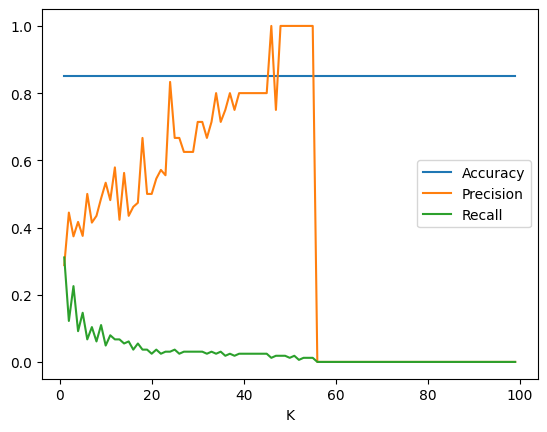

In [17]:
# Create a DataFrame from the lists
metrics_df = pd.DataFrame({
    'K': list_k,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall
})
metrics_df.plot(x="K")

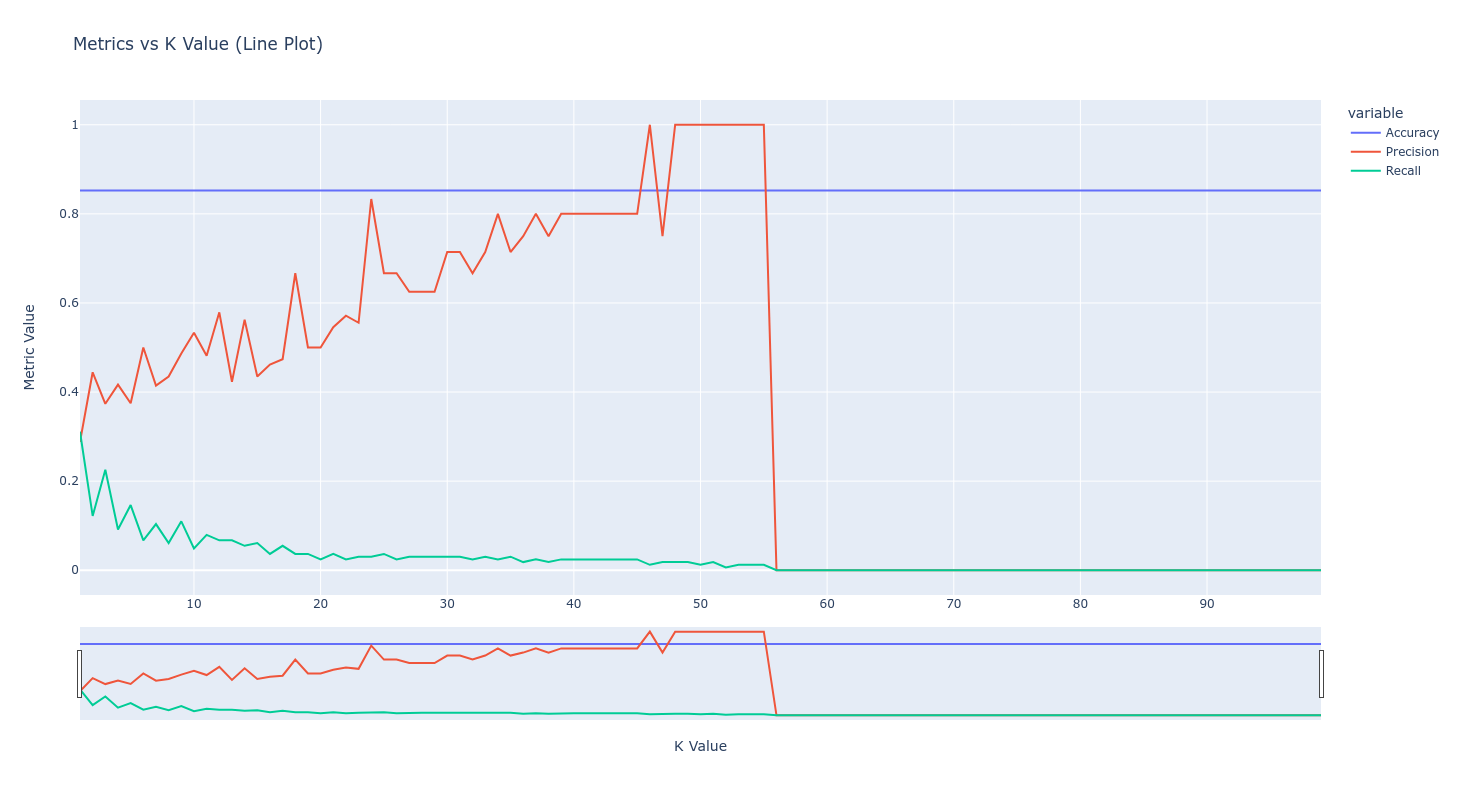

In [15]:
# Import plotly express for visualization
import plotly.express as px
import plotly.graph_objects as go

# Create line plot for Accuracy, Precision, and Recall
fig_line = px.line(metrics_df, x='K', y=['Accuracy', 'Precision', 'Recall'],
                   title='Metrics vs K Value (Line Plot)',
                   labels={'value': 'Metric Value', 'K': 'K Value'}, height=800)

# Create the slider for changing K value in both plots
fig_line.update_layout(
    xaxis=dict(
        rangeslider=dict(visible=True),
        type="linear"
    )
)


# Show both plots
fig_line.show()

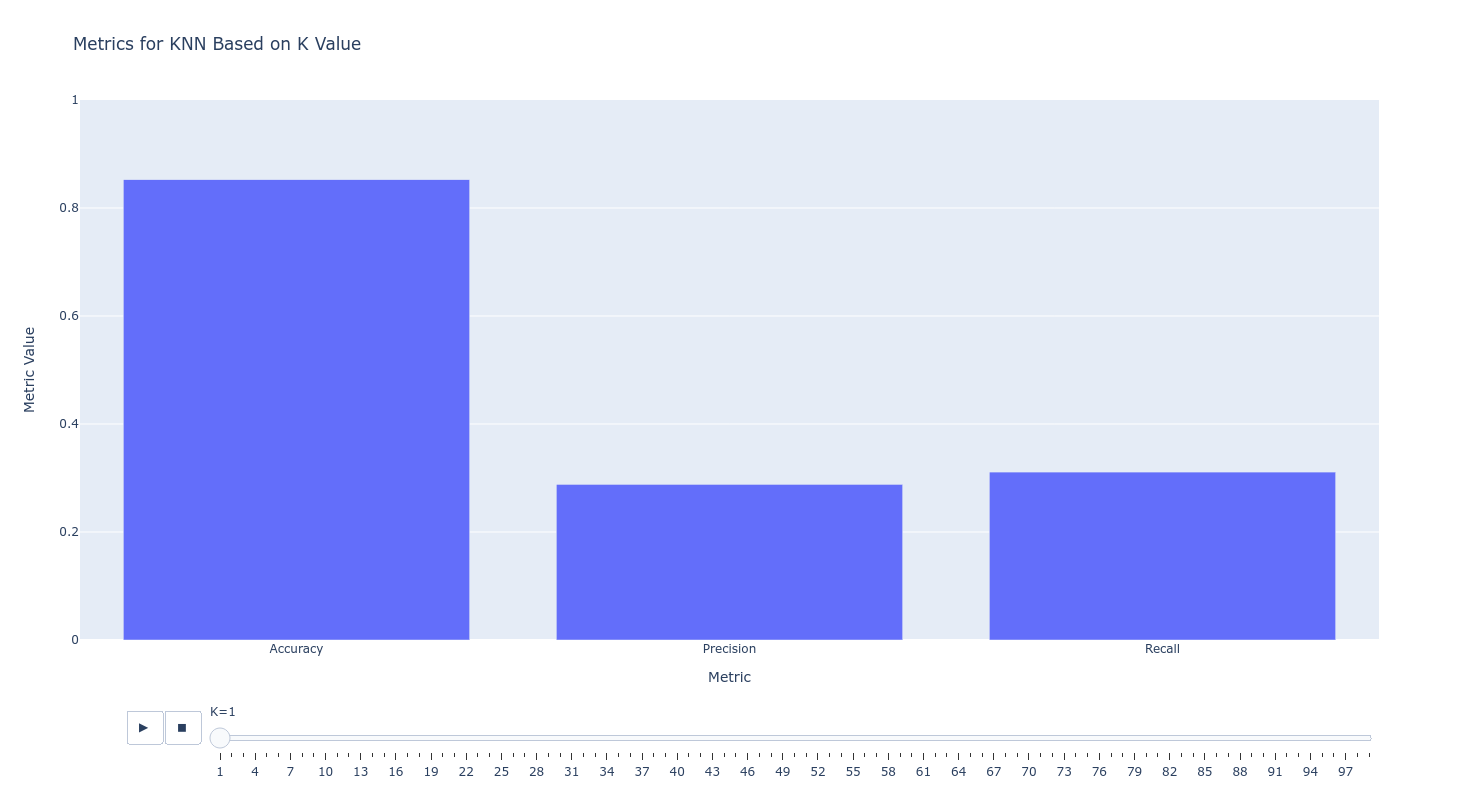

In [16]:
# Let's use Plotly Express to create an interactive plot with a slider to select the value of K
import plotly.express as px
import pandas as pd

# Prepare the data for a long format to use with Plotly Express
df_long = pd.melt(metrics_df, id_vars=['K'], value_vars=['Accuracy', 'Precision', 'Recall'], 
                  var_name='Metric', value_name='Value')

# Create the interactive bar plot with Plotly Express and add a slider for K values
fig = px.bar(df_long, x='Metric', y='Value', animation_frame='K',
             title='Metrics for KNN Based on K Value', 
             labels={'Value': 'Metric Value', 'Metric': 'Metric'},height=800,
             range_y=[0, 1])

# Display the plot
fig.show()


In [ ]:
pd.DataFrame(

In [19]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
data = pd.read_csv('MBA.csv')

# Display the first few rows of the dataset
data.head()


,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


In [20]:
data['race']=data['race'].fillna('International')
data['admission']=data['admission'].fillna('Deny')
data.isna().sum()

data["admission"].value_counts()
# Dropping all rows where the 'admission' column is 'Waitlist'
data = data[data['admission'] != 'Waitlist']

# Verifying that the 'Waitlist' rows are dropped
data['admission'].value_counts()

# Encode categorical variables
data['gender'] = data['gender'].map({'Male': 0, 'Female': 1})
data['international'] = data['international'].astype(int)
data['admission'] = data['admission'].map({'Admit': 1, 'Deny': 0})

# One-hot encode categorical columns like 'major', 'race', and 'work_industry'
data = pd.get_dummies(data, columns=['major', 'race', 'work_industry'], drop_first=True)

# Display the processed dataset
data.head()


,application_id,gender,international,gpa,gmat,work_exp,admission,major_Humanities,major_STEM,race_Black,...,work_industry_Health Care,work_industry_Investment Banking,work_industry_Investment Management,work_industry_Media/Entertainment,work_industry_Nonprofit/Gov,work_industry_Other,work_industry_PE/VC,work_industry_Real Estate,work_industry_Retail,work_industry_Technology
0,1,1,0,3.30,620.0,3.0,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,0,0,3.28,680.0,5.0,0,True,False,True,...,False,False,True,False,False,False,False,False,False,False
2,3,1,1,3.30,710.0,5.0,1,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,4,0,0,3.47,690.0,6.0,0,False,True,True,...,False,False,False,False,False,False,False,False,False,True
4,5,0,0,3.35,590.0,5.0,0,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
X = data.drop('admission', axis=1)
y = data['admission']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (KNN is sensitive to feature scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:

knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)


Accuracy: 0.85
Precision: 0.38
Recall: 0.15
F1-Score: 0.21
Confusion Matrix:


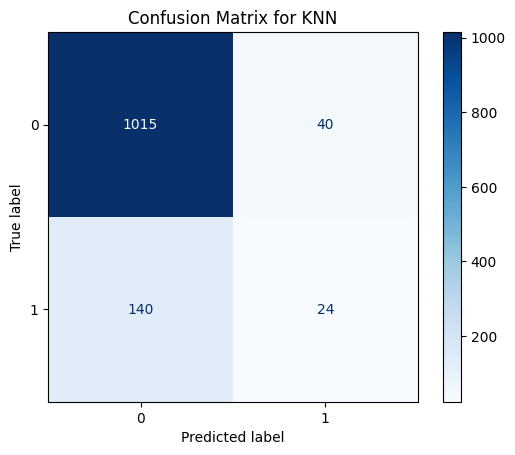

admission
Deny     5194
Admit     900
Name: count, dtype: int64